In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Converting categorical variables(like the sex, smoker and region columns) into numerical variable using one-hot encoding. We'll use the `get_dummies()` method in pandas.

In [4]:
insurance_one_hot=pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


Splitting our data into X and y

In [5]:
X=insurance_one_hot.drop('charges',axis=1)
y=insurance_one_hot['charges']

In [6]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [34]:
tf.random.set_seed(42)
insurance_model=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=['mae'])
history=insurance_model.fit(X_train,y_train,epochs=100,verbose=0)

In [35]:
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4850.8872 - mae: 4850.8872


[4850.88720703125, 4850.88720703125]

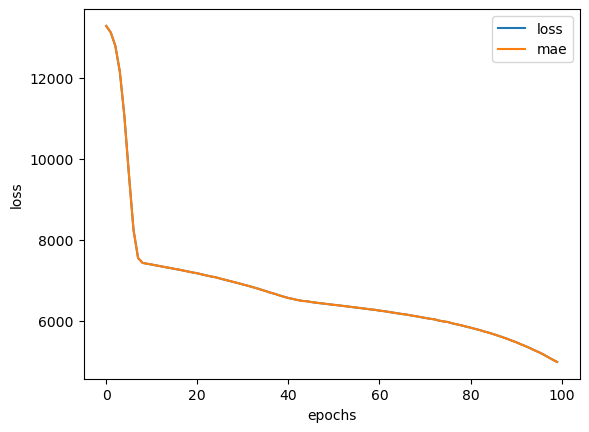

In [36]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [40]:
# Try training for a little longer (100 more epochs)
history_2 = insurance_model.fit(X_train, y_train, epochs=100, verbose=0)

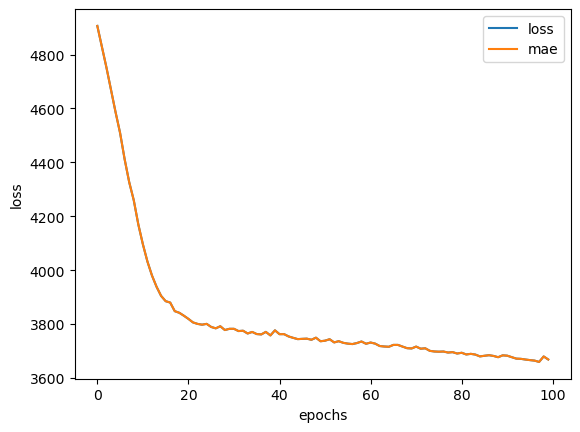

In [39]:
# Plot history (also known as a loss curve)
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

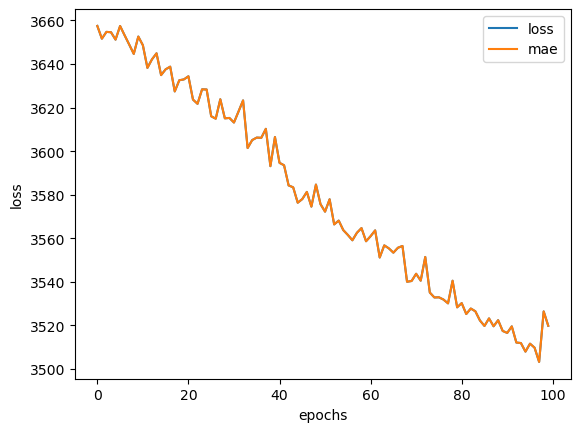

In [41]:
# Plot history (also known as a loss curve)
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");